# Netflix Movies and TV Shows Data Analysis

## Importing Libraries

We import essential libraries like Pandas for data manipulation, NumPy for numerical operations, Matplotlib and Seaborn for data visualization, and disable warnings for cleaner outputs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Loading the Dataset

We load the Netflix dataset into a Pandas DataFrame to explore its content. The head() method displays the first five rows, providing an overview of the data structure, including column names and sample records.

In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Dataset/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Preparation and Cleaning

We use info() to check the dataset's structure, including column names, data types, and the presence of missing values, helping us plan data cleaning steps.

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are a total of 8807 entries in the dataset with 12 columns holding data for each record. We can see that there are a few null values in columns like director, casr, country, date_added, rating, and duration.

To understand the dataset's variety, we check the number of unique values in each column. This highlights potential categorical features and gives insight into data diversity.

In [ ]:
netflix_df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


## Handling Null Values

We check whether the dataset contains any missing values. This helps determine the need for data cleaning.

In [ ]:
netflix_df.isnull().values.any()

True

We calculate the total number of missing values per column to understand the extent of missing data and plan appropriate handling methods.

In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


We visualize missing values using a heatmap. This makes it easier to identify patterns of missing data in specific columns.

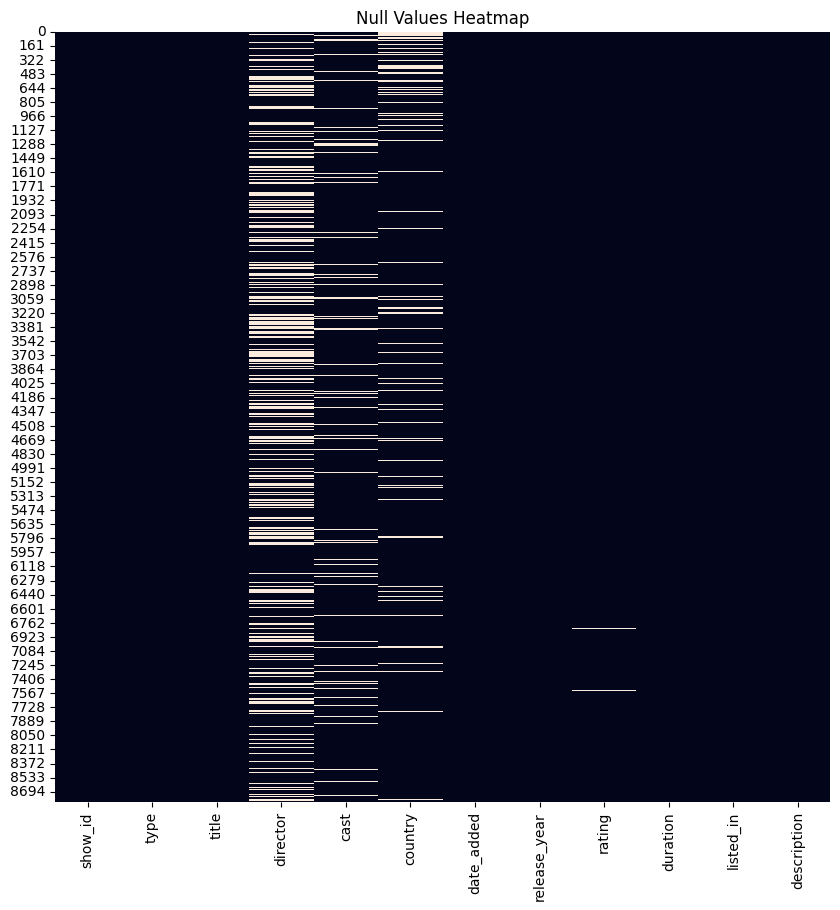

In [ ]:
# Null Values Heatmap
plt.figure(figsize=(10, 10))
plt.title('Null Values Heatmap')
sns.heatmap(netflix_df.isnull(), cbar=False)
plt.show()

From the heatmap above, we can see that there are quite a lot of null values in the dataset. We need to handle these missing values before starting exploratory data analysis.

We handle missing values by filling blanks in columns like director, cast, and country with placeholder text. We drop rows with critical missing values in date_added, rating, and duration to preserve data integrity.

In [ ]:
netflix_df.fillna({'director': 'No Director'}, inplace=True)
netflix_df.fillna({'cast': 'No Cast'}, inplace=True)
netflix_df.fillna({'country': 'Country Unavailable'}, inplace=True)
netflix_df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [ ]:
netflix_df.isnull().any()

,0
show_id,False
type,False
title,False
director,False
cast,False
country,False
date_added,False
release_year,False
rating,False
duration,False


By now, we have handled all the missing values and all the values in the dataset are not-null values.

## Splitting the Dataset

Now, we filter the dataset to create a separate DataFrame for movies, enabling focused analysis on film-related features.

In [ ]:
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Similarly, we create another DataFrame for TV shows to perform show-specific analysis.

In [ ]:
netflix_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## Data Preparation

We clean the duration column by converting movie durations to integers and renaming TV show durations as seasons, ensuring consistent and usable numeric formats.

In [ ]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min', '').astype('int')
netflix_shows_df.rename(columns={'duration': 'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons': {'1 Season': '1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons', '').astype('int')

In [ ]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## Visualization

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Movies vs TV Shows

We start by visualizing the number of Movies and TV Shows.

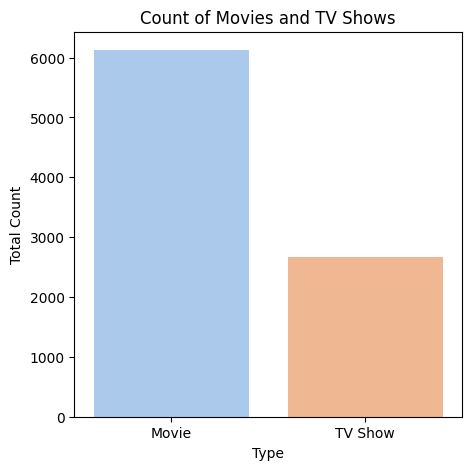

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.countplot(data=netflix_df, x='type', hue='type', palette='pastel')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Total Count')
plt.show()

We also visualize the percentage distribution of movies and TV Shows as part of entire Netflix content.

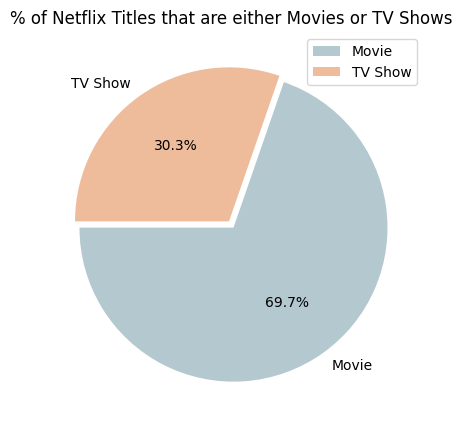

In [ ]:
plt.figure(figsize=(10,5))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['#B3C8CF', '#EFBC9B'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

### Netflix Film Ratings

In [ ]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Next, we create a visualization to depict the rating-wise categorization of movies and TV shows. We exclude 'NR' (not-rated) and 'UR' (unrated) from the visualization.

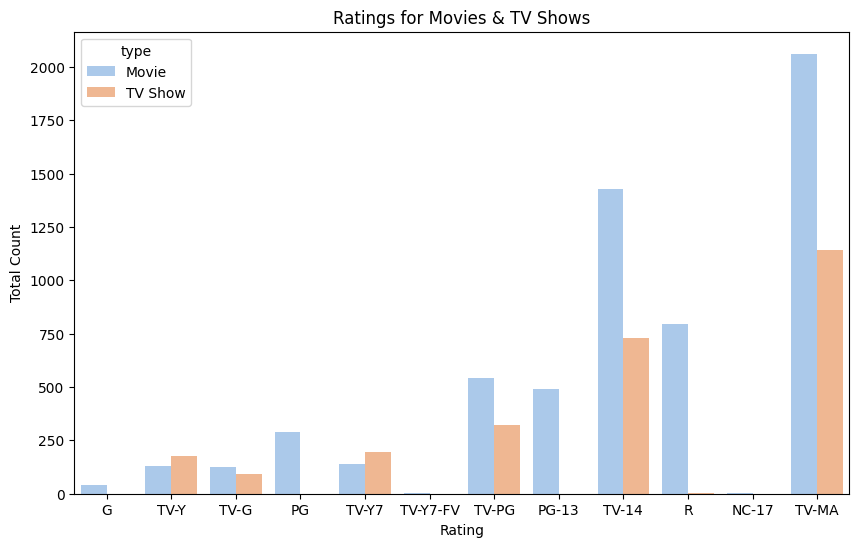

In [ ]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10,6))
g = sns.countplot(x='rating', data=netflix_df, hue='type', order=order, palette="pastel")
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

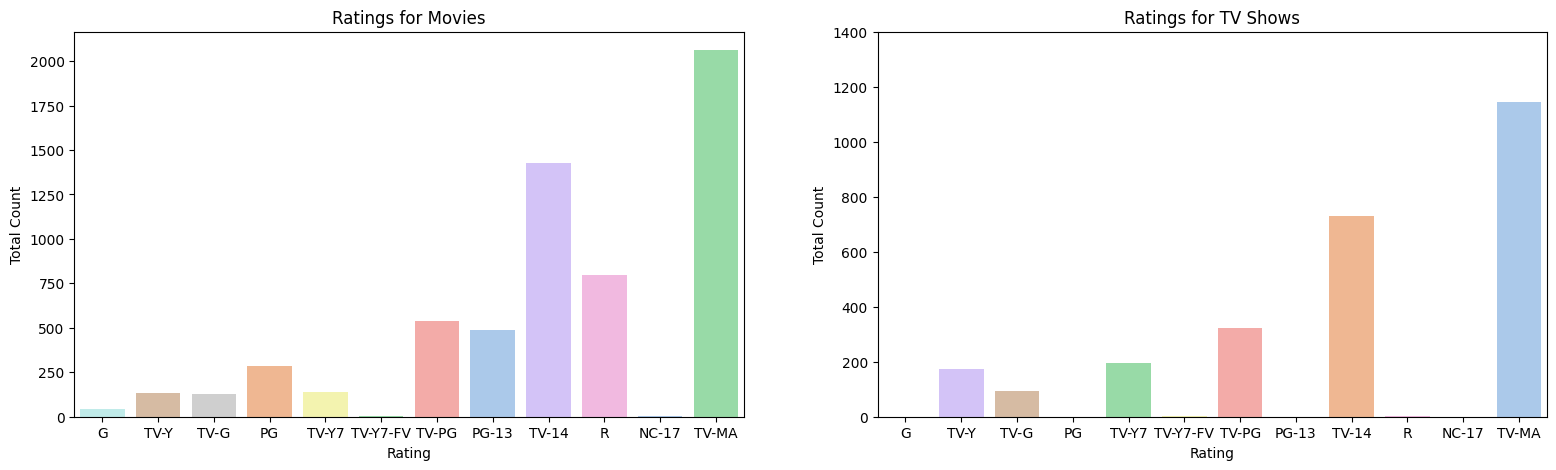

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(x = 'rating', data=netflix_movies_df, order=order, hue ='rating', palette="pastel", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(x = 'rating', data=netflix_shows_df, order=order,hue = 'rating', palette="pastel", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [ ]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

### Content added each year

Next, we filter out an year-wise count of Netflix content added.

In [ ]:
netflix_year = netflix_df['year_added'].value_counts().to_frame().reset_index()
netflix_year = netflix_year.rename(columns={'count': 'count','year_added':'year'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


In [ ]:
netflix_year2 = netflix_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'count': 'count','year_added':'year'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'count': 'count','year_added':'year'})
show_year = show_year[show_year.year != 2020]

We use a line plot to visualize the trend of total content added each year, upto 2019.

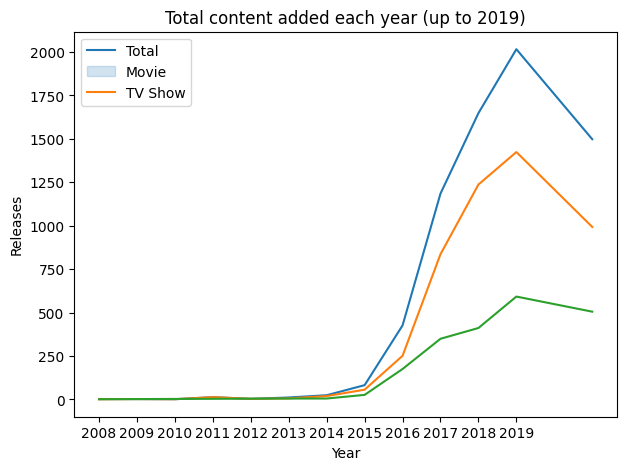

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above plot, it is evident that since 2014, there has been a rise in the amount of content added onto the Netflix platform.

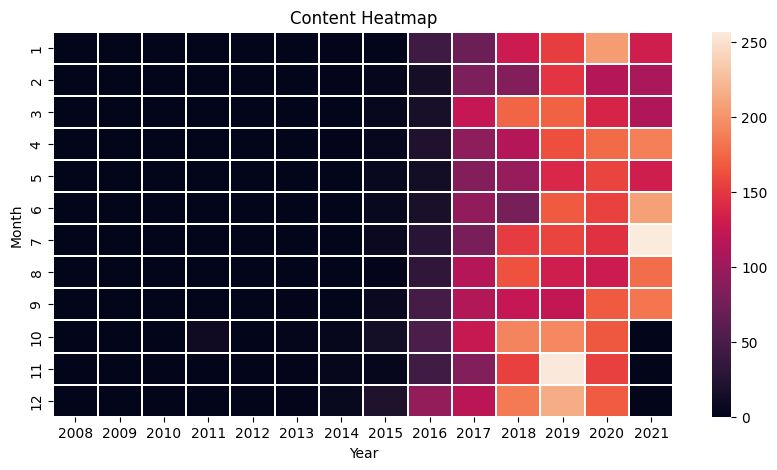

In [ ]:
month_year_df = netflix_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(10,5))
sns.heatmap(month_year_df, linewidths=0.025, cmap=sns.color_palette("rocket", as_cmap=True))
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

### Countries with most content available

Here is a country-wise countplot for Netflix content, filtering out the top 20 countries on Netflix by content.

<ipython-input-107-f44144f111ab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=filtered_countries, order=filtered_countries.value_counts().index[:20], palette='mako')


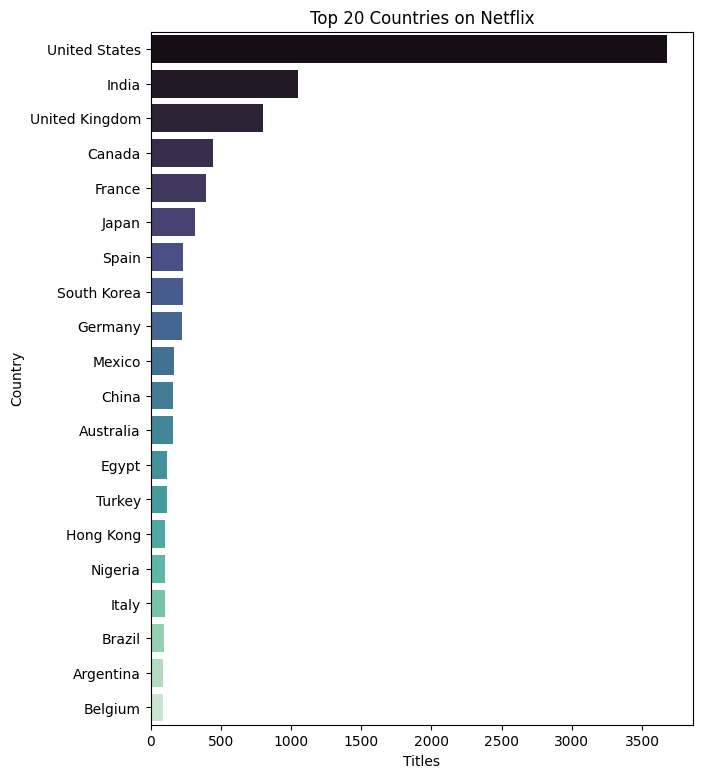

In [ ]:
filtered_countries = netflix_df['country'].str.split(', ', expand=True).stack()
filtered_countries = filtered_countries.reset_index(drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
filtered_countries = filtered_countries.dropna()

plt.figure(figsize=(7, 9))
g = sns.countplot(y=filtered_countries, order=filtered_countries.value_counts().index[:20], palette='mako')
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

### Popular Genres

Similary, a genre-wise depiction of Netflix content using countplot.

<ipython-input-109-a84a4e1ab108>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=filtered_genres, order=filtered_genres.value_counts().index[:20], palette='mako')


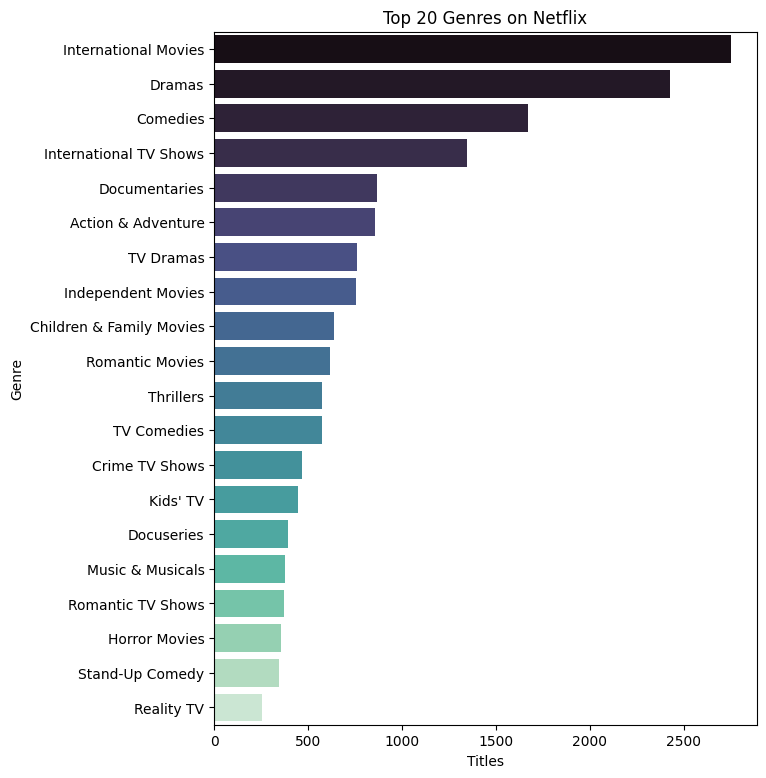

In [ ]:
filtered_genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()
filtered_genres = filtered_genres.reset_index(drop=True)
filtered_genres = filtered_genres.dropna()

plt.figure(figsize=(7, 9))
g = sns.countplot(y=filtered_genres, order=filtered_genres.value_counts().index[:20], palette='mako')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genre')
plt.show()

### Top 10 directors on Netflix with the most releases

<ipython-input-103-39fb37ef54ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')


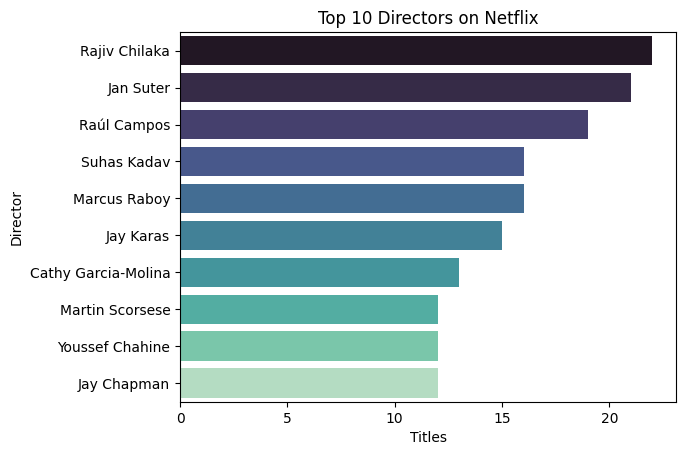

In [ ]:
filtered_directors = netflix_df['director'].str.split(', ', expand=True).stack()
filtered_directors = filtered_directors.reset_index(drop=True)
filtered_directors = filtered_directors[filtered_directors != 'No Director']
filtered_directors = filtered_directors.dropna()

sns.countplot(y=filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Titles')
plt.ylabel('Director')
plt.show()

### Top 10 Actors on Netflix based on number of titles

<ipython-input-102-432d4c09499c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_cast, order=filtered_cast.value_counts().index[:10], palette='mako')


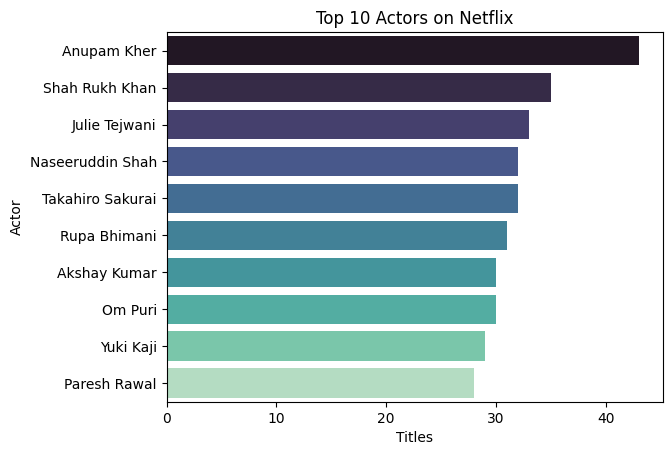

In [ ]:
filtered_cast = netflix_df['cast'].str.split(', ', expand=True).stack()
filtered_cast = filtered_cast.reset_index(drop=True)
filtered_cast = filtered_cast[filtered_cast != 'No Cast']
filtered_cast = filtered_cast.dropna()

sns.countplot(y=filtered_cast, order=filtered_cast.value_counts().index[:10], palette='mako')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Titles')
plt.ylabel('Actor')
plt.show()

### International Movies vs International TV Shows over the years

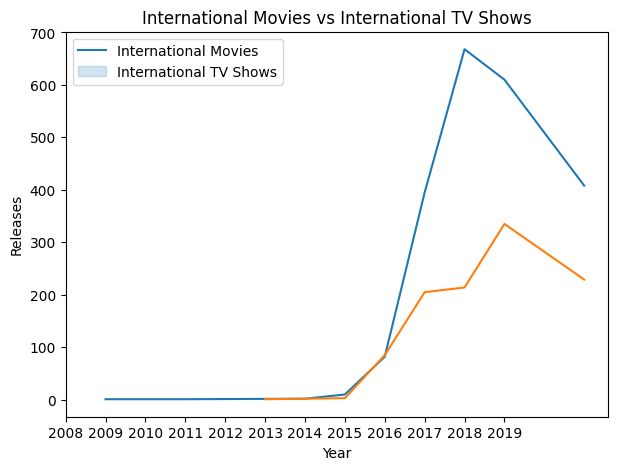

In [ ]:
international_movies = netflix_df[netflix_df['listed_in'].str.contains('International Movies')]
int_mov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'count': 'count','year_added':'year'})
int_mov_year = int_mov_year[int_mov_year.year != 2020]

international_shows = netflix_df[netflix_df['listed_in'].str.contains('International TV Shows')]
int_show_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'count': 'count','year_added':'year'})
int_show_year = int_show_year[int_show_year.year != 2020]

fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=int_mov_year, x='year', y='count')
sns.lineplot(data=int_show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("International Movies vs International TV Shows")
plt.legend(['International Movies','International TV Shows'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

## Inferences
Analysis of available data indicates substantial growth for Netflix over time. This growth can be attributed, in part, to strategic marketing initiatives aimed at penetrating new global markets. Recent data indicates a global subscriber base of approximately 282.7 million as of Q3 2024. This is distributed between 66.7 million in the US and a significantly larger portion internationally. Notably, following its IPO, Netflix's subscriber base was initially concentrated within the United States. The subsequent expansion into international markets appears to be a key driver of the company's success. Content prioritization strategies reflect the influence of market popularity, with a demonstrable increase in international film and television content correlating with Netflix's global expansion efforts.